# Лабораторная работа № 1. Предварительная обработка данных
## Выполнил: Нагайцев Илья, 15-АС
### Варинат 6: Индекс счастья
### Задания:
1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.
3. Оцените количество счастья по годам по регионам.
6. Удалите строки с пропущенными значениями.
4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.
5. Определите страны, появляющиеся и исчезающие в рейтинге стран.
7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

#### Результат выполнения функций библиотеки Pandas(head, tail, info, describe, dropna, drop_duplicates, shape):

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

y15df = pd.read_csv('2015.csv')
y16df = pd.read_csv('2016.csv')
y17df = pd.read_csv('2017.csv')

In [2]:
y15df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
y15df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
y15df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
y15df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 13.6+ KB


In [6]:
y16df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 14.8+ KB


In [7]:
y17df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.0+ KB


In [8]:
#handling missing data and duplicates
y15df.drop_duplicates()
y15df.dropna()
y16df.drop_duplicates()
y16df.dropna()
y17df.drop_duplicates()
y17df.dropna()
pass

In [9]:
y15df.shape, y16df.shape, y17df.shape

((158, 12), (157, 13), (155, 12))

#### Настройка окружения

In [10]:
#fixing year 2017 column names
colNames = {}
for colName in y17df.columns:
    newColName = colName
    
    #fixing broken parantheses if any
    if(newColName.find('..') != -1):
        newColName = colName.replace('..', ' (')[::-1].replace('.', ')', 1)[::-1]
        
    newColName = newColName.replace('.', ' ')
    colNames[colName] = newColName
y17df = y17df.rename(index=str, columns=colNames)

### 1. Графическое представление корреляции

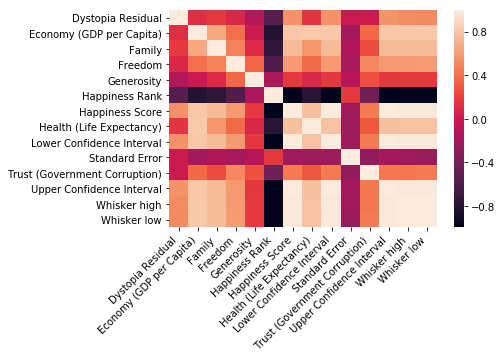

In [11]:
df_all = pd.concat([pd.concat([y15df, y16df]), y17df]).groupby(['Country']).mean()
df_all = df_all.dropna()

sns.heatmap(df_all.corr())
plt.xticks(rotation=45, ha='right')
plt.show()

### 2. График счастья по регионам

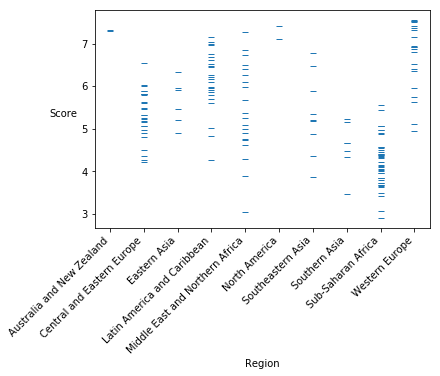

In [12]:
df_all = pd.concat([pd.concat([y15df, y16df]), y17df]).groupby(['Region', 'Country']).mean()

scores = df_all["Happiness Score"]
region_indices = df_all.index.labels[0]
regions = df_all.index.levels[0][region_indices]

plt.plot(regions, scores, '_')
plt.ylabel(s="Score", rotation='horizontal', ha='right')
plt.xlabel(s="Region")
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Количество счастья по регионам

In [13]:
# 2017 does not contain 'region' column, so we need to fix it
cr_15 = y15df.loc[:, ('Country', 'Region')]
cr_16 = y16df.loc[:, ('Country', 'Region')]
cr_15_16 = cr_15.merge(cr_16, how='outer')
y17df_with_regions = y17df.merge(cr_15_16, on='Country')

pd.DataFrame({
    '2015 Score': y15df.groupby(['Region'])['Happiness Score'].mean(),
    '2016 Score': y16df.groupby(['Region'])['Happiness Score'].mean(),
    '2017 Score': y17df_with_regions.groupby(['Region'])['Happiness Score'].mean()
})

,2015 Score,2016 Score,2017 Score
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.496500
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


### 4. Рейтинг изменчивости признаков

In [14]:
def print_rating(df, label):
    rating = df.std() / df.mean()
    print('\n{}\n{}'.format(label, rating.sort_values()[::-1]))
    
df_all = pd.concat([pd.concat([y15df, y16df]), y17df])
    
print_rating(y15df, "2015")
print_rating(y16df, "2016")
print_rating(y17df, "2017")
print_rating(df_all, 'Summary')


2015
Trust (Government Corruption)    0.836930
Happiness Rank                   0.575572
Generosity                       0.533870
Economy (GDP per Capita)         0.476425
Health (Life Expectancy)         0.392026
Standard Error                   0.358072
Freedom                          0.351581
Family                           0.274830
Dystopia Residual                0.263724
Happiness Score                  0.212996
dtype: float64

2016
Trust (Government Corruption)    0.806822
Happiness Rank                   0.575659
Generosity                       0.551263
Economy (GDP per Capita)         0.432544
Health (Life Expectancy)         0.411301
Freedom                          0.392208
Family                           0.336062
Dystopia Residual                0.233132
Lower Confidence Interval        0.217334
Happiness Score                  0.212121
Upper Confidence Interval        0.207315
dtype: float64

2017
Trust (Government Corruption)    0.825702
Happiness Rank              

### 5. Появляющиеся и исчезающие страны

In [15]:
def get_diff(first, second):
    summary = pd.merge(first, second, how='outer', indicator=True, on='Country')
    return summary[summary['_merge'] != 'both']

diff1516 = get_diff(y15df, y16df)
diff1517 = get_diff(y15df, y17df)
diff1617 = get_diff(y16df, y17df)
merged_diff = pd.merge(pd.merge(diff1516, diff1517, how='outer'), diff1617, how='outer') 

print(merged_diff['Country'].drop_duplicates())

0                         Oman
1            Somaliland region
2                   Mozambique
3                      Lesotho
4                    Swaziland
5                     Djibouti
6     Central African Republic
7                  Puerto Rico
8                       Belize
9                      Somalia
10           Somaliland Region
11                     Namibia
12                 South Sudan
13                      Taiwan
14                    Suriname
15                   Hong Kong
16                        Laos
17                     Comoros
18    Taiwan Province of China
20     Hong Kong S.A.R., China
Name: Country, dtype: object


### 6. Вычисление корреляции Trust-Family и оценка p-value

Pearson p-value: 0.0005581455267774639
Spearman p-value: 0.033030560192946354


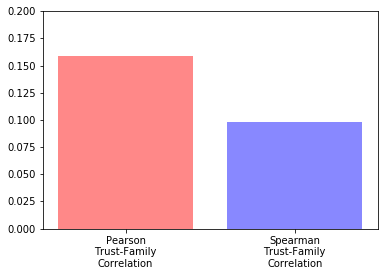

In [16]:
df_all = pd.concat([pd.concat([y15df, y16df]), y17df])

for seria in df_all.drop(['Country', 'Region'], axis=1):
    df_all[seria] = df_all[seria].fillna(df_all[seria].mean())
    
pearson_corr, pearson_pval = stats.pearsonr(df_all['Family'], df_all['Trust (Government Corruption)'])
spearman_corr, spearman_pval = stats.spearmanr(df_all['Family'], df_all['Trust (Government Corruption)'])

labels = ('Pearson\nTrust-Family\nCorrelation', 'Spearman\nTrust-Family\nCorrelation')
plt.bar(range(2), [pearson_corr, spearman_corr], color=('#ff8888', '#8888ff'), tick_label=labels)
plt.ylim(ymax=0.2)

print('Pearson p-value: {}\nSpearman p-value: {}'.format(pearson_pval, spearman_pval))

### 7. Добавление нового признака

In [17]:
df_all = pd.concat([pd.concat([y15df, y16df]), y17df]).groupby(['Country']).mean()
df_all.fillna(0)

df_all['New'] = df_all['Freedom'] / df_all['Family']
df_all.head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker high,Whisker low,New
Country,,,,,,,,,,,,,,,
Afghanistan,2.082827,0.367856,0.331588,0.168207,0.329884,149.333333,3.576333,0.219179,3.288,0.03084,0.076489,3.432,3.873661,3.714338,0.507276
Albania,1.772514,0.943388,0.703218,0.352496,0.170811,104.333333,4.752667,0.758160,4.546,0.05013,0.052335,4.764,4.752464,4.535536,0.501261
Algeria,2.802911,1.027938,1.019009,0.243062,0.072699,53.000000,5.944000,0.617762,6.227,0.05099,0.160499,6.483,5.978286,5.765714,0.238528
Angola,1.886154,0.821173,0.876157,0.036577,0.114025,139.333333,3.898000,0.088870,3.753,0.04758,0.075093,3.979,3.951642,3.638358,0.041747
Argentina,2.859952,1.130058,1.251600,0.455700,0.111286,26.666667,6.607667,0.726492,6.560,0.04612,0.072513,6.740,6.690085,6.507915,0.364094
